In [7]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xray
import seaborn.apionly as sb

In [38]:
!ls ../data/*.nc

../data/wmt_upper_0243m.nc  ../data/wmt_upper_0671m.nc
../data/wmt_upper_0438m.nc  ../data/wmt_upper_1021m.nc


In [39]:
depths = [243, 438, 671, 1021]
dss = [xray.open_dataset('../data/wmt_upper_%04dm.nc' % d).mean(dim='time')/1e6
      for d in depths]

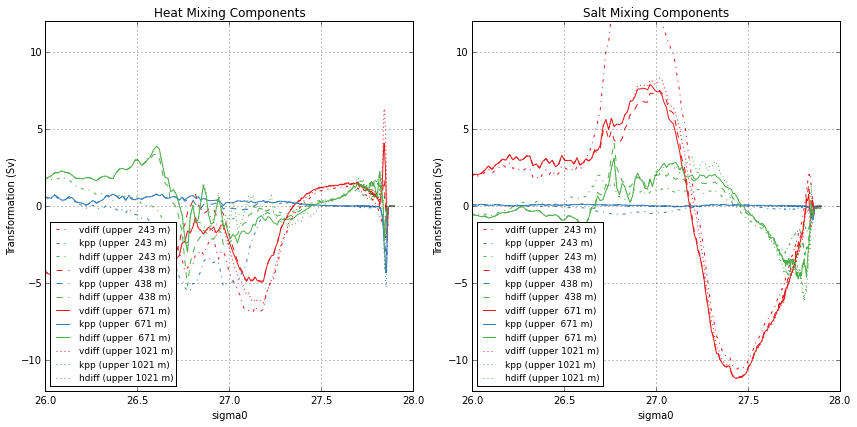

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
for ds, d, ls in zip(dss, depths, ['-.', '--','-',':']):
    for prefix, ax in zip(['heat_', 'salt_'], axs):
        for v, c in zip(['vdiff', 'kpp', 'hdiff'], sb.palettes.color_palette('Set1', 3)):
            lab = v + ' (upper %4d m)' % d
            ds[prefix + v].plot.line(label=lab, color=c, linestyle=ls, ax=ax)

for ax in axs:
    ax.legend(loc='lower left', fontsize=9)
    ax.grid()
    ax.set_xlim([26,28])
    ax.set_ylabel('Transformation (Sv)')
    ax.set_ylim([-12,12])
axs[0].set_title('Heat Mixing Components')
axs[1].set_title('Salt Mixing Components')

plt.tight_layout()
plt.savefig('../figures_ice_moc/mixing_depth_comparison.pdf')

In [9]:
fig, ax = plt.subplots()
for v in ['heat_vdiff', 'heat_kpp', 'heat_hdiff']:
    ds[v].plot(label=v)
ax.legend(loc='lower left')
ax.grid()

In [43]:
ds

<xray.Dataset>
Dimensions:        (sigma0: 399)
Coordinates:
  * sigma0         (sigma0) float64 22.53 22.55 22.58 22.6 22.63 22.65 22.68 ...
Data variables:
    salt_surfflux  (sigma0) float64 -0.1224 -0.1248 -0.1359 -0.1479 -0.1584 ...
    salt_linfs     (sigma0) float64 0.05077 0.06399 0.07738 0.018 0.01988 ...
    salt_adv       (sigma0) float64 -0.08054 -0.109 -0.1306 -0.0858 -0.106 ...
    salt_hdiff     (sigma0) float64 0.004451 0.005654 0.00721 0.009196 ...
    salt_kpp       (sigma0) float64 -0.001212 -0.005247 -0.0004812 -0.002861 ...
    salt_tot       (sigma0) float64 -0.07142 -0.08956 -0.1115 -0.141 -0.1606 ...
    salt_vdiff     (sigma0) float64 0.07749 0.07989 0.0709 0.06833 0.07809 ...
    heat_surfflux  (sigma0) float64 3.138 3.633 4.082 4.76 5.39 5.759 6.239 ...
    heat_linfs     (sigma0) float64 -0.01596 -0.02193 -0.02448 -0.005042 ...
    heat_adv       (sigma0) float64 0.05709 0.04574 0.03922 0.005411 ...
    heat_kpp       (sigma0) float64 -0.1595 -0.1411 -0.1074